In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
train_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

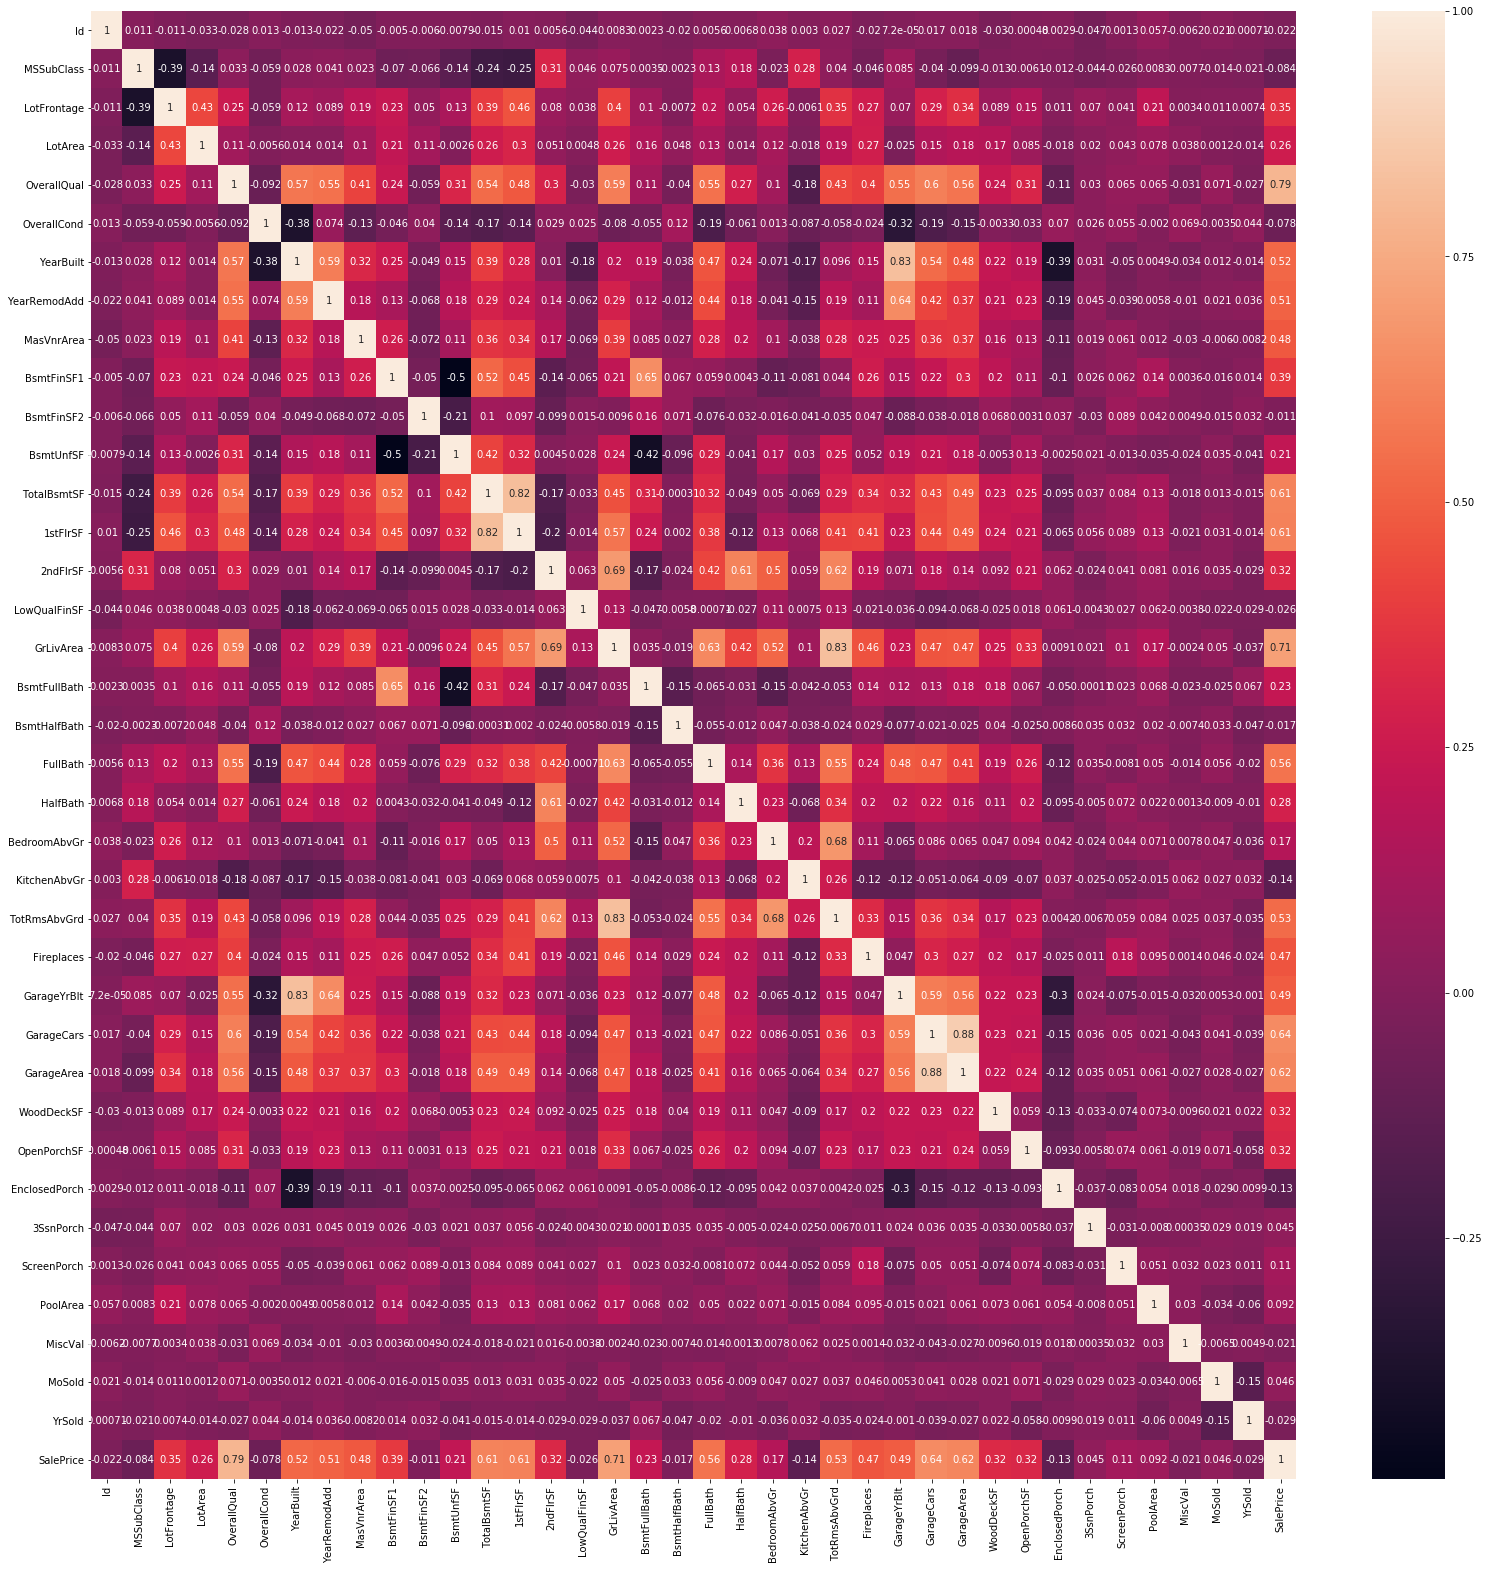

In [6]:
f, ax =plt.subplots(figsize=(27,27))
f=sns.heatmap(train_df.corr(),annot=True)

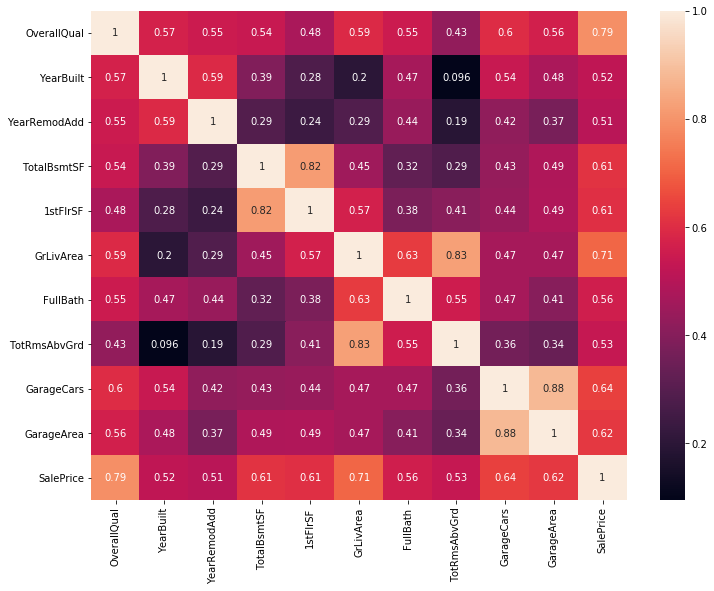

In [7]:
corrmat=train_df.corr()
top_features=corrmat.index[corrmat["SalePrice"]>0.5]
f,ax=plt.subplots(figsize=(12,9))
f=sns.heatmap(train_df[top_features].corr(),annot=True)

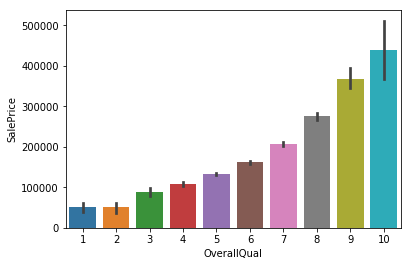

In [8]:
sns.barplot('OverallQual','SalePrice',data=train_df)

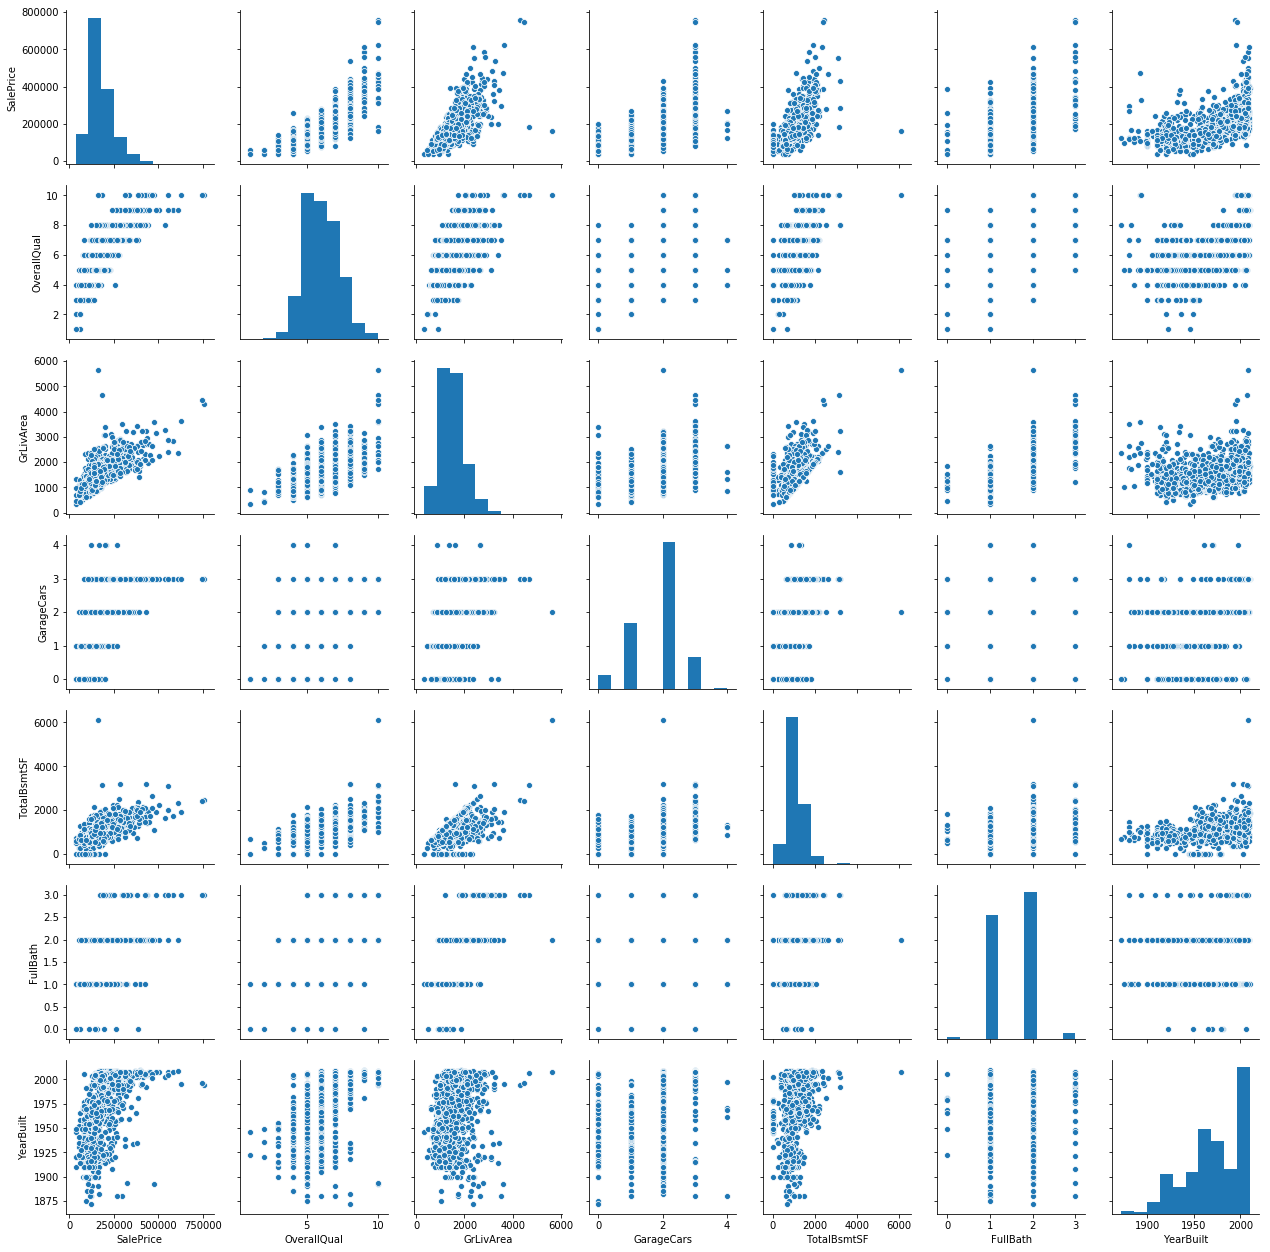

In [9]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols])
plt.show()

Text(0, 0.5, 'Frequency')

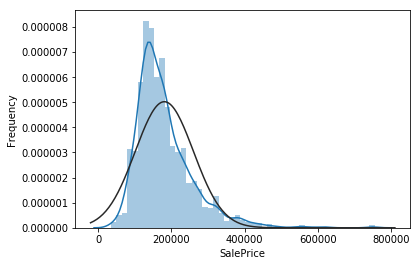

In [10]:
from scipy.stats import norm, skew
sns.distplot(train_df['SalePrice'],fit=norm)
plt.ylabel('Frequency')

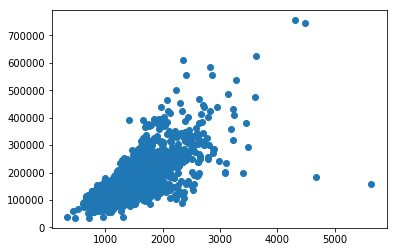

In [11]:
plt.scatter(y=train_df.SalePrice,x=train_df.GrLivArea)

In [12]:
train_df.SalePrice=np.log1p(train_df.SalePrice)
y=train_df.SalePrice

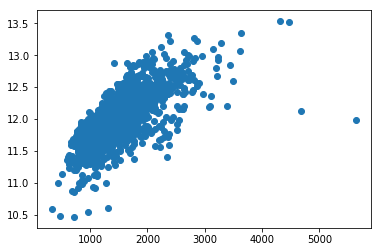

In [13]:
plt.scatter(y=train_df.SalePrice,x=train_df.GrLivArea)

Text(0, 0.5, 'Frequency')

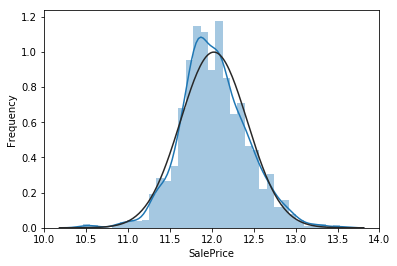

In [14]:
sns.distplot(train_df.SalePrice,fit=norm)
plt.ylabel('Frequency')

Finding important features

In [15]:
corr=train_df.corr()
corr.sort_values(["SalePrice"],inplace=True,ascending=False)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [16]:
categorical_features=train_df.select_dtypes(include=["object"]).columns

numerical_features=train_df.select_dtypes(exclude=["object"]).columns
train_num=train_df[numerical_features]
train_cat=train_df[categorical_features]

In [17]:
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [18]:
train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [20]:
skewed_feats=train_num.apply(lambda x: skew(x))

In [21]:
skewd_feats=skewed_feats[skewed_feats>0.75]

In [22]:
skewed_feats=skewed_feats.index
train_df[skewed_feats]=np.log1p(train_df[skewed_feats])

In [23]:
train_df[skewed_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.693147,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,7.605392,2.583824
1,1.098612,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,1.791759,7.604894,2.573300
2,1.386294,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,2.302585,7.605392,2.589054
3,1.609438,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,1.098612,7.604396,2.553297
4,1.791759,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,2.564949,7.605392,2.597433


In [24]:
train_df=train_df.fillna(train_df.mean())

In [25]:
train_df=pd.get_dummies(train_df)

In [26]:
target=train_df['SalePrice']

In [27]:
train_df.drop(['Id'],axis=1,inplace=True)

In [28]:
train_df.drop(['SalePrice'],axis=1,inplace=True)

Ridge model

In [29]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score,train_test_split

In [30]:
X_train,x_test,Y_train,y_test=train_test_split(train_df,target,test_size=0.25,random_state=0)

In [31]:
alphas=[0.05,0.1,0.3,0.5,1,3,5,10,15,30,50,75]


In [32]:
model_ridge = RidgeCV(alphas=alphas).fit(X_train, Y_train)

In [33]:
def rmse_cv_train(model):
    rmse=np.sqrt(-cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=5))
    return(rmse)

def rmse_cv_test(model):
    rmse=np.sqrt(-cross_val_score(model,x_test,y_test,scoring="neg_mean_squared_error",cv=5))
    return(rmse)

In [34]:
rmse_cv_train(model_ridge).mean()

0.009693896245671494

In [35]:
cv_ridge=[rmse_cv_train(Ridge(alpha=alpha)).mean()
            for alpha in alphas]

In [36]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge

0.05     0.010317
0.10     0.010204
0.30     0.009991
0.50     0.009892
1.00     0.009781
3.00     0.009683
5.00     0.009677
10.00    0.009748
15.00    0.009858
30.00    0.010225
50.00    0.010670
75.00    0.011132
dtype: float64

Text(0, 0.5, 'rmse')

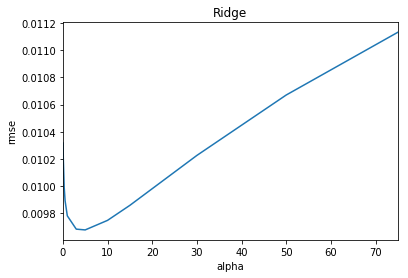

In [37]:
cv_ridge.plot(title="Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [38]:
alpha=model_ridge.alpha_
alpha

5.0

In [39]:
rmse_cv_test(model_ridge).mean()

0.013421094966279721

In [40]:
cv_ridge.mean()

0.010098258174235333

In [41]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 282 variables and eliminated the other 6 variables


In [42]:
ridge_train_predicted=model_ridge.predict(X_train)

In [43]:
ridge_test_predicted=model_ridge.predict(x_test)

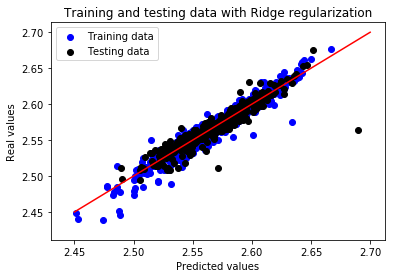

In [44]:
plt.scatter(ridge_train_predicted,Y_train,c="blue",label="Training data")
plt.scatter(ridge_test_predicted,y_test,c="black",label="Testing data")
plt.title("Training and testing data with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([2.45, 2.7], [2.45, 2.7], c = "red")
plt.show()

LASSO

In [45]:
model_lasso=LassoCV(alphas=[1,0.1,0.001,0.0005]).fit(X_train,Y_train)

In [46]:
rmse_cv_train(model_lasso).mean()

0.011541035455424026

In [47]:
rmse_cv_test(model_lasso).mean()

0.013004267296010208

In [48]:
model_lasso.alpha_

0.0005

In [49]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 31 variables and eliminated the other 257 variables


In [50]:
lasso_train_predicted=model_lasso.predict(X_train)

In [51]:
lasso_test_predicted=model_lasso.predict(x_test)

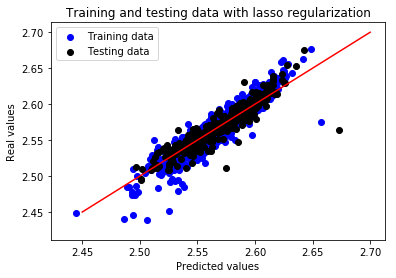

In [52]:
plt.scatter(lasso_train_predicted,Y_train,c="blue",label="Training data")
plt.scatter(lasso_test_predicted,y_test,c="black",label="Testing data")
plt.title("Training and testing data with lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([2.45, 2.7], [2.45, 2.7], c = "red")
plt.show()

XGBoost

In [53]:
import xgboost as xgb

In [54]:
dtrain=xgb.DMatrix(X_train,label=Y_train)
dtest=xgb.DMatrix(x_test)
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

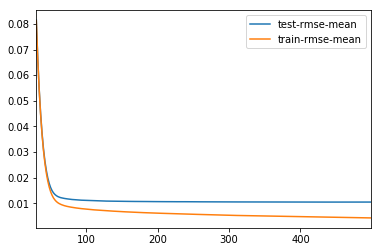

In [55]:
model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()

In [56]:
model_xgb=xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.1)
model_xgb.fit(X_train,Y_train)

[23:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
rmse_cv_train(model_xgb).mean()

[23:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.009693548229952572

In [58]:
rmse_cv_test(model_xgb).mean()

[23:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.011699197678854934

In [59]:
xgb_predicted_train=model_xgb.predict(X_train)

In [60]:
xgb_predicted_test=model_xgb.predict(x_test)

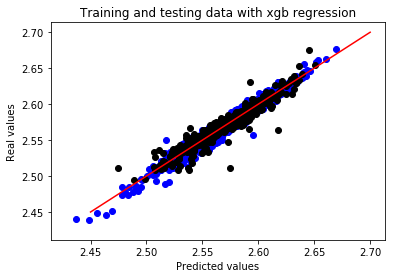

In [61]:
plt.scatter(xgb_predicted_train,Y_train,c="blue",label="Trainig data")
plt.scatter(xgb_predicted_test,y_test,c="black",label="Testing data")
plt.title("Training and testing data with xgb regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([2.45, 2.7], [2.45, 2.7], c = "red")

plt.show()